In [125]:
import numpy as np
import tensorflow
from tensorflow import keras
import os
print('done imports')

print(os.getcwd())

done imports
/home/sherrware/projects/j_project


In [126]:
imgs = np.load('data/kmnist-train-imgs.npz')['arr_0']
labels = np.load('data/kmnist-train-labels.npz')['arr_0']

print('imgs shape:' + repr(imgs.shape))
print('imgs dtype:' + repr(imgs.dtype))

print('labels shape:' + repr(labels.shape))
print('labels dtype:' + repr(labels.dtype))

batch_size = 128
num_classes = 10
epochs = 12

imgs shape:(60000, 28, 28)
imgs dtype:dtype('uint8')
labels shape:(60000,)
labels dtype:dtype('uint8')


In [127]:
imgs = imgs/255.0

x_valid, x_train, = imgs[:5000], imgs[5000:]
xcv_valid = x_valid.reshape(list(x_valid.shape) + [1])
xcv_train = x_train.reshape(list(x_train.shape) + [1])

y_valid, y_train = labels[:5000], labels[5000:]
print(y_valid)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)
print(y_valid)

[8 7 0 ... 0 7 7]
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [140]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [141]:
model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adadelta(),
              metrics=["accuracy"])

In [142]:
conv_model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 32)        1600      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_32 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_70 (Dense)             (None, 64)              

In [147]:
history = model.fit(xcv_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(xcv_valid,y_valid))

Epoch 1/12
430/430 [==============================] - 49s 114ms/step - loss: 1.2750 - accuracy: 0.6171 - val_loss: 1.0741 - val_accuracy: 0.7228
Epoch 2/12
430/430 [==============================] - 57s 132ms/step - loss: 1.2320 - accuracy: 0.6285 - val_loss: 1.0279 - val_accuracy: 0.7300
Epoch 3/12
430/430 [==============================] - 54s 124ms/step - loss: 1.1884 - accuracy: 0.6410 - val_loss: 0.9866 - val_accuracy: 0.7364
Epoch 4/12
430/430 [==============================] - 53s 123ms/step - loss: 1.1527 - accuracy: 0.6525 - val_loss: 0.9509 - val_accuracy: 0.7464
Epoch 5/12
430/430 [==============================] - 50s 116ms/step - loss: 1.1156 - accuracy: 0.6611 - val_loss: 0.9183 - val_accuracy: 0.7530
Epoch 6/12
430/430 [==============================] - 48s 113ms/step - loss: 1.0933 - accuracy: 0.6675 - val_loss: 0.8906 - val_accuracy: 0.7602
Epoch 7/12
430/430 [==============================] - 50s 117ms/step - loss: 1.0656 - accuracy: 0.6761 - val_loss: 0.8657 - val_ac

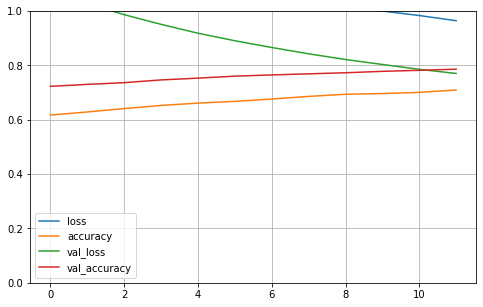

In [149]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [150]:
model.save('./goodmodel.h5')